[[10  4  2]
 [ 7 11  4]
 [ 0  5 18]]
              precision    recall  f1-score   support

           0       0.59      0.62      0.61        16
           1       0.55      0.50      0.52        22
           2       0.75      0.78      0.77        23

    accuracy                           0.64        61
   macro avg       0.63      0.64      0.63        61
weighted avg       0.64      0.64      0.64        61

output: [1 0 0 0 2 0 0 1 1 2 0 0 1 1 1 2 0 2 0 2 1 1 1 1 2 1 1 2 1 2 1 0 1 2 0 2 0
 2 2 0 2 2 1 2 0 2 1 1 0 2 2 2 0 2 2 1 1 0 2 2 2]
test accuracy: 0.639344262295082


Text(0.5, 1.0, 'Confusion matrix of k-nearest neighbor')

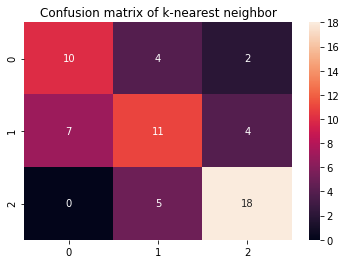

In [2]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
%matplotlib inline

def convert(data):
    number = preprocessing.LabelEncoder()
    data['age'] = number.fit_transform(data.age)
    data['gender'] = number.fit_transform(data.gender)
    data['type'] = number.fit_transform(data.type)
    data['gradeVA'] = number.fit_transform(data.gradeVA)
    data['RAPD'] = number.fit_transform(data.RAPD)
    data['zone'] = number.fit_transform(data.zone)
    data['traumaticcataract'] = number.fit_transform(data.traumaticcataract)
    data['TON'] = number.fit_transform(data.TON)
    data['FB'] = number.fit_transform(data.FB)
    data['RD'] = number.fit_transform(data.RD)
    data['Endophthalmitis'] = number.fit_transform(data.Endophthalmitis)
    data['OTStotalscore'] = number.fit_transform(data.OTStotalscore)
    data['lastFUBGrade'] = number.fit_transform(data.lastFUBGrade)
    data=data.fillna(-999)
    return data

data = pd.read_csv("ogithreeCat.csv")
data = convert(data)

X = data.iloc[:, :-1]
y = data.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.20)

knn_model = KNeighborsClassifier(n_neighbors=4)
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print ("output:", y_pred)
print("test accuracy:",knn_model.score(X_test,y_test))

cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, fmt='d').set_title('Confusion matrix of k-nearest neighbor') # fmt='d' formats the numbers as digits, which means integers




[2.2 2.  1.6 1.  4.  0.  0.6 2.2 2.  2.4 1.2 2.  2.  2.  1.8 3.  0.4 3.4
 1.8 2.8 1.8 2.  2.2 2.2 2.  1.6 2.2 1.8 2.  3.6 2.  0.  1.8 3.  0.2 2.8
 0.4 3.6 1.6 0.  3.4 3.4 1.6 2.2 0.2 1.4 2.  2.2 0.  3.  3.  2.2 1.2 3.6
 3.2 2.2 2.2 1.8 2.  2.6 2.8]
mae: 0.3344262295081968
mse: 0.2150819672131148
rmse: 0.46376930387113247
r2: 0.7131046762419415, 
mae: 0.4385245901639344 
mse: 0.36145264116575593 
rmse: 0.601209315601277


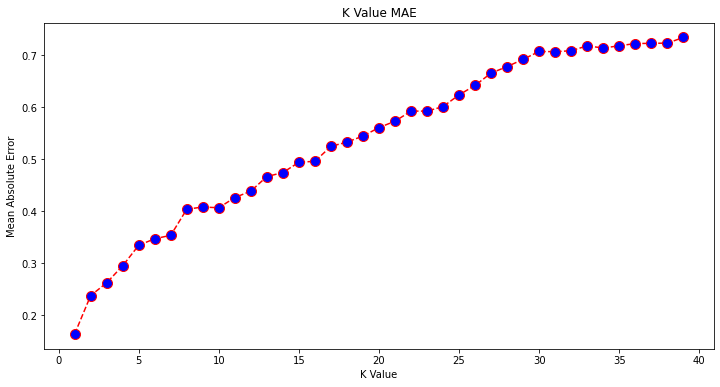

In [5]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor

def convert(data):
    number = preprocessing.LabelEncoder()
    data['age'] = number.fit_transform(data.age)
    data['gender'] = number.fit_transform(data.gender)
    data['type'] = number.fit_transform(data.type)
    data['gradeVA'] = number.fit_transform(data.gradeVA)
    data['RAPD'] = number.fit_transform(data.RAPD)
    data['zone'] = number.fit_transform(data.zone)
    data['traumaticcataract'] = number.fit_transform(data.traumaticcataract)
    data['TON'] = number.fit_transform(data.TON)
    data['FB'] = number.fit_transform(data.FB)
    data['RD'] = number.fit_transform(data.RD)
    data['Endophthalmitis'] = number.fit_transform(data.Endophthalmitis)

    data['OTStotalscore'] = number.fit_transform(data.OTStotalscore)
    data['lastFUBGrade'] = number.fit_transform(data.OTStotalscore)   
    data=data.fillna(-999)
    return data

data = pd.read_csv("ogi.csv")
data = convert(data)
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


regressor = KNeighborsRegressor(n_neighbors=5)
regressor.fit(X_train, y_train)


y_pred = regressor.predict(X_test)

print (y_pred)
from sklearn.metrics import mean_absolute_error, mean_squared_error


mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f'mae: {mae}')
print(f'mse: {mse}')
print(f'rmse: {rmse}')
regressor.score(X_test, y_test)

error = []


for i in range(1, 40):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    mae = mean_absolute_error(y_test, pred_i)
    error.append(mae)
import matplotlib.pyplot as plt 

plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', 
         linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
         
plt.title('K Value MAE')
plt.xlabel('K Value')
plt.ylabel('Mean Absolute Error')

knn_reg12 = KNeighborsRegressor(n_neighbors=12)
knn_reg12.fit(X_train, y_train)
y_pred12 = knn_reg12.predict(X_test)
r2 = knn_reg12.score(X_test, y_test) 

mae12 = mean_absolute_error(y_test, y_pred12)
mse12 = mean_squared_error(y_test, y_pred12)
rmse12 = mean_squared_error(y_test, y_pred12, squared=False)
print(f'r2: {r2}, \nmae: {mae12} \nmse: {mse12} \nrmse: {rmse12}')

In [1]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
%matplotlib inline

def convert(data):
    number = preprocessing.LabelEncoder()
    data['age'] = number.fit_transform(data.age)
    data['gender'] = number.fit_transform(data.gender)
    data['type'] = number.fit_transform(data.type)
    data['gradeVA'] = number.fit_transform(data.gradeVA)
    data['RAPD'] = number.fit_transform(data.RAPD)
    data['zone'] = number.fit_transform(data.zone)
    data['traumaticcataract'] = number.fit_transform(data.traumaticcataract)
    data['TON'] = number.fit_transform(data.TON)
    data['FB'] = number.fit_transform(data.FB)
    data['RD'] = number.fit_transform(data.RD)
    data['Endophthalmitis'] = number.fit_transform(data.Endophthalmitis)
    data['OTStotalscore'] = number.fit_transform(data.OTStotalscore)
    data['lastFUBGrade'] = number.fit_transform(data.lastFUBGrade)
    data=data.fillna(-999)
    return data

data = pd.read_csv("normalizedogithreeCat.csv")
data = convert(data)

X = data.iloc[:, :-1]
y = data.iloc[:, -1]


kf = KFold(n_splits=10, random_state=42, shuffle=True)
model = KNeighborsClassifier(n_neighbors=5)
for train_index, test_index in kf.split(X):
   #split the data
   X_train, X_test = X.iloc[train_index], X.iloc[test_index]
   y_train, y_test = y.iloc[train_index], y.iloc[test_index]
   #fit the model
   model.fit(X_train, y_train)
   #make predictions
   predictions = model.predict(X_test)
   #calculate accuracy
   accuracy = model.score(X_test, y_test)
   print('Accuracy:', accuracy)
    
print ("output:", y_pred) 
print("test accuracy:",model.score(X_test,y_test))



Accuracy: 0.5483870967741935
Accuracy: 0.6
Accuracy: 0.5666666666666667
Accuracy: 0.5333333333333333
Accuracy: 0.5333333333333333
Accuracy: 0.6
Accuracy: 0.7333333333333333
Accuracy: 0.7
Accuracy: 0.7666666666666667
Accuracy: 0.6666666666666666


NameError: name 'y_pred' is not defined